<font color='darkgreen'>**Problem Definition**</font>


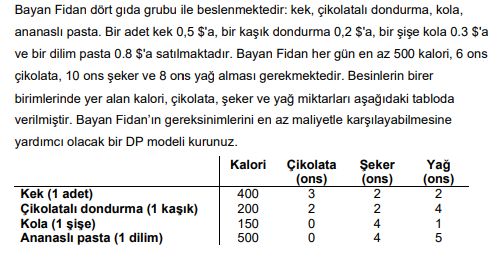

<font color='darkgreen'>**Closed Formula Form**</font>

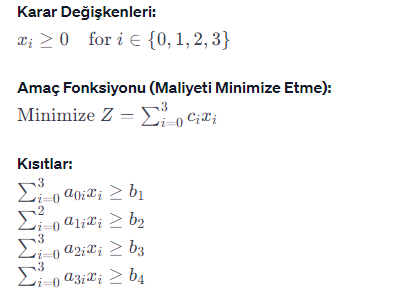

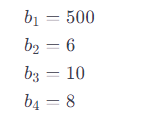

<font color='darkgreen'>**Coding**</font>


In [1]:
#Install gurobipy library
!pip install gurobipy

In [2]:
#Import necessary libraries and initialize the model
from gurobipy import *
import numpy as np
import gurobipy as gp
from gurobipy import GRB
from gurobipy import quicksum

mdl = gp.Model("Dietary Problem")

Restricted license - for non-production use only - expires 2025-11-24


Parameters and Variables

In [3]:
#Variables
karar_degiskenleri = [0,1,2,3]

#PARAMETERS!
#RHS
b = [500,6,10,8]
#fiyat
c = [50, 20, 30, 80]

#kalori
k = [400, 200, 150, 500]

#Çikolata
ç = [3,2,0,0]

#Şeker
s = [2,2,4,4]

#Yağ
y = [2,4,1,5]

Descision Variables

In [4]:
#xi decision variables
x = mdl.addVars(karar_degiskenleri, vtype= GRB.INTEGER, name = 'x')

Constraints

In [5]:

mdl.addConstr((quicksum(k[i]*x[i] for i in range(4))) >= 500, name='Kalori')
mdl.addConstr((quicksum(ç[i]*x[i] for i in range(4))) >= 6, name='Çikolata' )
mdl.addConstr((quicksum(s[i]*x[i] for i in range(4))) >= 10, name='Şeker')
mdl.addConstr((quicksum(y[i]*x[i] for i in range(4))) >= 8, name='Yağ')


<gurobi.Constr *Awaiting Model Update*>

Objective Function

In [6]:
mdl.setObjective(quicksum(c[i]*x[i] for i in range(4)))

Optimize it!

In [7]:
mdl.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i3-10100F CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 4 columns and 14 nonzeros
Model fingerprint: 0x11f39ea1
Variable types: 0 continuous, 4 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [2e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 5e+02]
Found heuristic solution: objective 140.0000000
Presolve time: 0.00s
Presolved: 4 rows, 4 columns, 14 nonzeros
Variable types: 0 continuous, 4 integer (0 binary)
Found heuristic solution: objective 90.0000000

Root relaxation: cutoff, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff 

In [8]:
for i in mdl.getVars():
  print(i.VarName, i.x)

x[0] 0.0
x[1] 3.0
x[2] 1.0
x[3] 0.0
